# Plot some WindCube data

In [1]:
from datetime import datetime
import lzma
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import re

# from metpy.units import units

import mypaths

In [2]:
inputdir = mypaths.igp_data_dir / 'Windcube'

In [3]:
date = datetime(2018, 2, 14)

In [4]:
fname = inputdir / f'WLS866-14_{date:%Y_%m_%d__%H_%M_%S}.sta.7z'

In [5]:
fname.exists()

True

In [6]:
with lzma.open(fname, 'rb') as zf:
    df = pd.read_csv(zf, # uncompressed file buffer
                     header=40, # skip 40 lines
                     delimiter='\t', # tab as delimiter
                     escapechar='\u00B0', # escape degree sign
                     parse_dates=[0], # the first column is date-time
                     index_col=0) # use the first column as index

In [7]:
# for i in df.columns:
#     print(re.match(r'(?P<height>[0-9]{2,3})m', i).group('height'))

In [8]:
wspd_cols = [i for i in df.columns if re.match(r'[0-9]{2,3}m Wind Speed \(m/s\)', i)]

In [9]:
wspd_df = df[wspd_cols]
wspd_df = wspd_df.reindex(wspd_df.index.rename('Time'))

In [10]:
wspd_df.head()

,40m Wind Speed (m/s),60m Wind Speed (m/s),80m Wind Speed (m/s),100m Wind Speed (m/s),120m Wind Speed (m/s),140m Wind Speed (m/s),160m Wind Speed (m/s),180m Wind Speed (m/s),200m Wind Speed (m/s),230m Wind Speed (m/s),260m Wind Speed (m/s),290m Wind Speed (m/s)
Time,,,,,,,,,,,,
2018-02-14 00:10:00,9.33,9.45,9.46,9.45,9.48,9.46,9.43,9.38,9.34,9.30,9.28,9.18
2018-02-14 00:20:00,8.87,9.01,9.12,9.23,9.22,9.25,9.19,9.17,9.19,9.30,9.41,9.50
2018-02-14 00:30:00,8.29,8.37,8.40,8.41,8.44,8.47,8.53,8.48,8.47,8.41,8.42,8.55
2018-02-14 00:40:00,7.99,8.12,8.11,8.05,8.01,7.96,7.99,7.88,7.80,7.67,7.61,7.64
2018-02-14 00:50:00,7.83,7.90,8.03,8.03,8.04,7.94,7.88,7.92,7.90,7.82,7.71,7.67


Plot the wind speed (time, height)

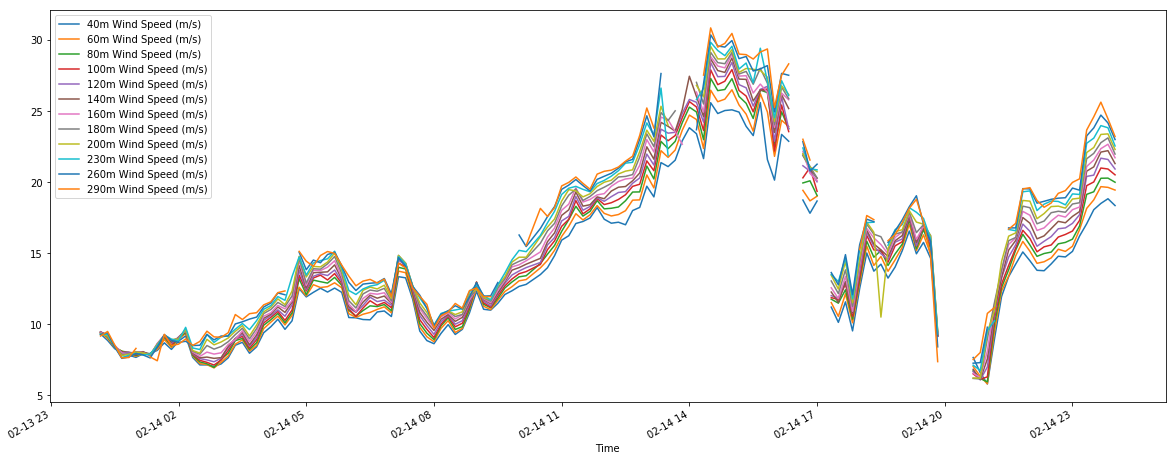

In [11]:
wspd_df.plot(legend=True, figsize=(20, 8));